In [1]:
import Global_Functions as gf
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
OPEN_FOLDER = "../Data/Preped_Data/"

In [3]:
image_path = "../Images/"
image_folder = image_path + "Visualization_Data/"

gf.check_folder(image_path)
gf.check_folder(image_folder)

Folder already exists.
Folder already exists.


In [4]:
def plot_experiment(name, start = None, end = None):
    exp = gf.open_CSV_file(name + '_short.csv', OPEN_FOLDER)
    
    spin_head = exp.filter(regex = ("spinning_.*"))[start:end]
    
    fig, axs = plt.subplots(2,2, sharex = True, gridspec_kw={'wspace':0.5}, figsize = (15,10))
    
    axs[1,1].plot(exp['time'][start:end], exp['th_power'][start:end], color = gf.get_color('grey'), label = 'th_power')
    axs[1,1].set_ylabel('th_power', color = gf.get_color('grey'))
    axs[1,1].set_ylim([3000, 21000])
    
    axs[1,0].plot(exp['time'][start:end], exp['el_power'][start:end], color = gf.get_color('orange'), label = 'el_power')
    axs[1,0].set_ylabel('el_power', color = gf.get_color('orange'))
    axs[1,0].set_ylim([0,4000])
    
    axs[0,0].plot(exp['time'][start:end], exp['input_voltage'][start:end], color = gf.get_color('green'), label = 'input_voltage')
    axs[0,0].set_ylabel('voltage', color = gf.get_color('green'))
    axs[0,0].set_ylim([-0.5, 10.5])
    
    axs[0,1].plot(exp['time'][start:end], spin_head, color = gf.get_color('blue'), label = 'spinning')
    axs[0,1].set_ylabel('spinning', color = gf.get_color('blue'))
    axs[0,1].set_ylim([2900,4000])

    plt.xlabel('Time')
    fig.legend()
    fig.suptitle('Visualization of ' + name, fontsize = 25)
    plt.show()
    fig.savefig(image_folder + name + ".png")
    fig.savefig(image_folder + name + ".svg")

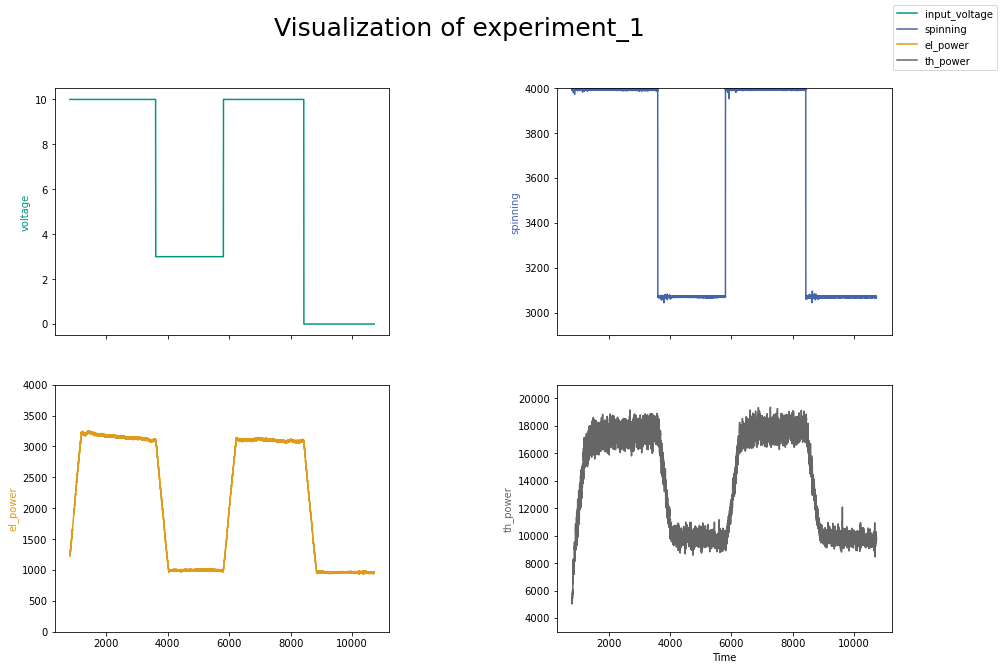

In [5]:
plot_experiment("experiment_1")

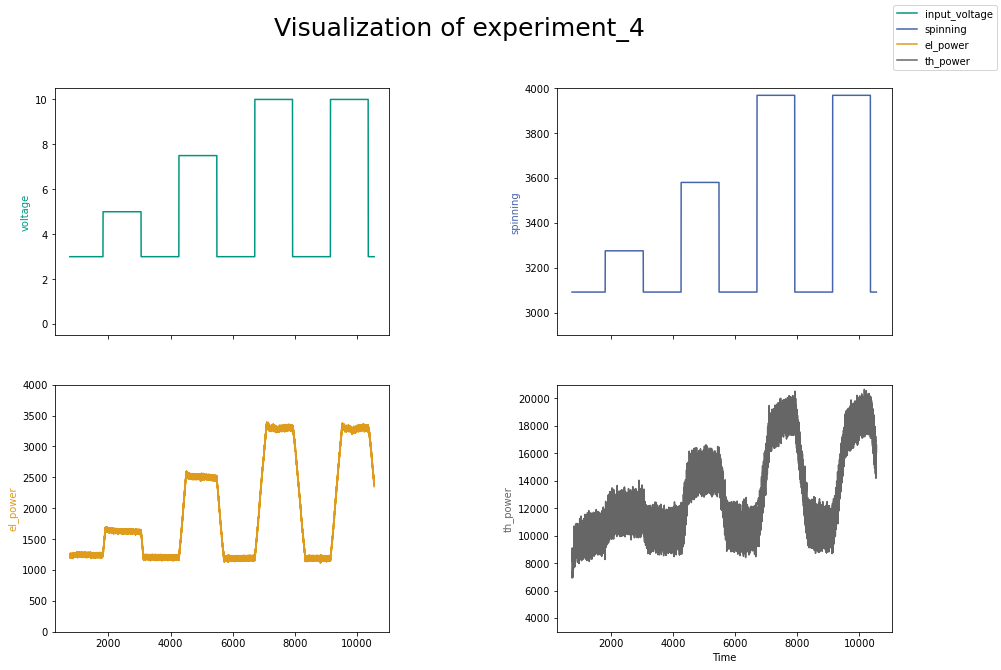

In [6]:
plot_experiment("experiment_4")

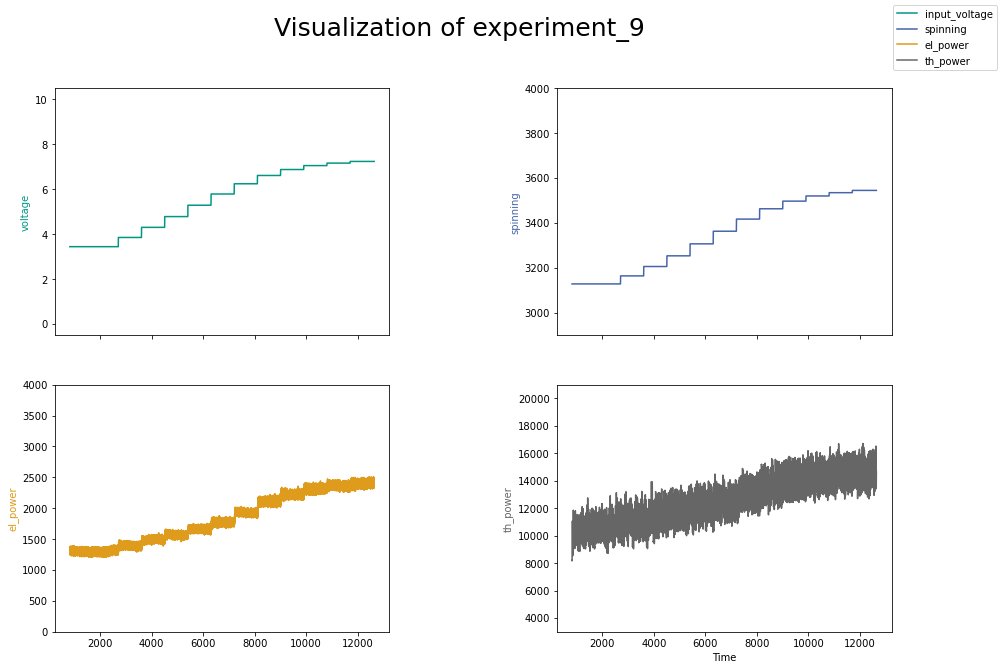

In [7]:
plot_experiment("experiment_9")

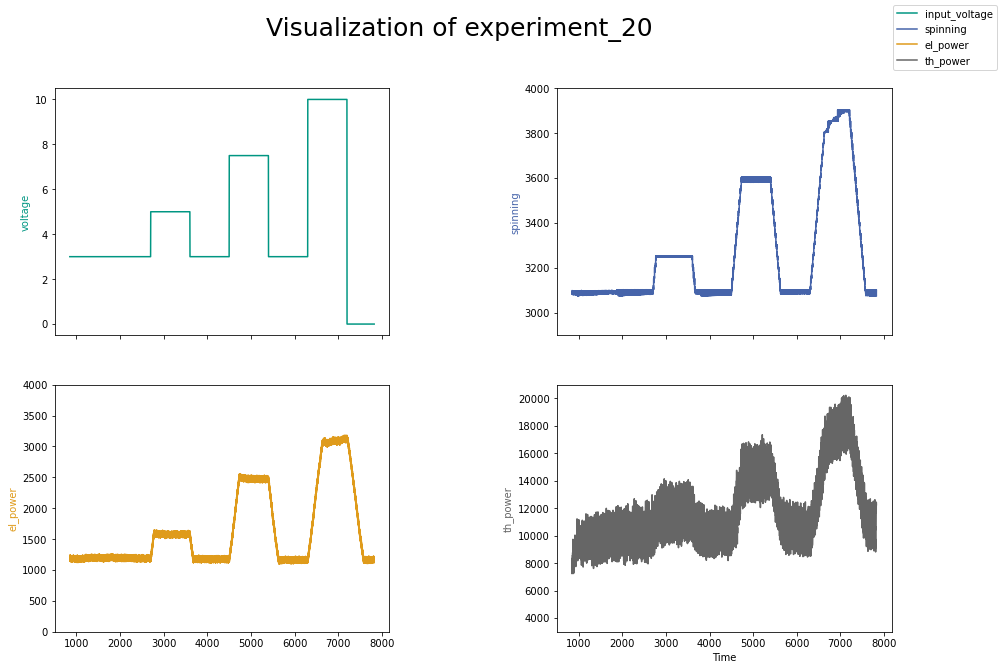

In [8]:
plot_experiment("experiment_20")

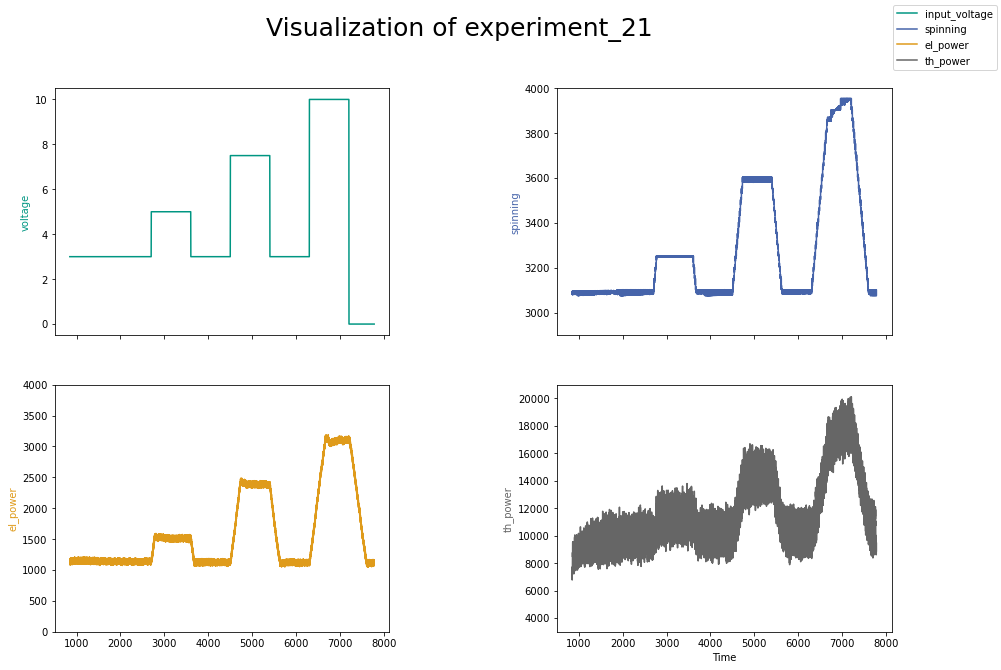

In [9]:
plot_experiment("experiment_21")

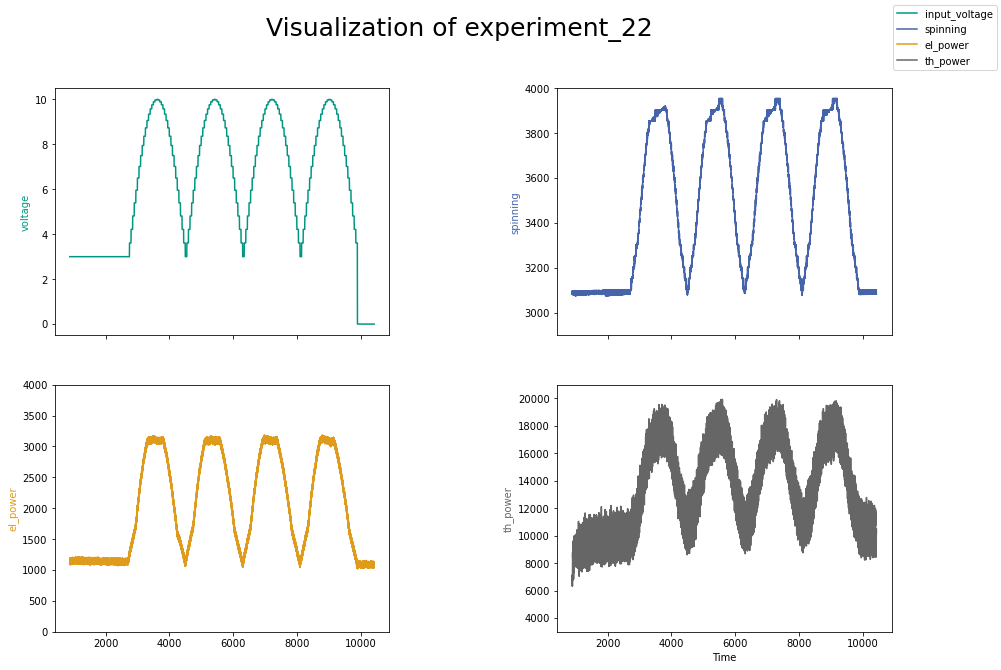

In [10]:
plot_experiment("experiment_22")

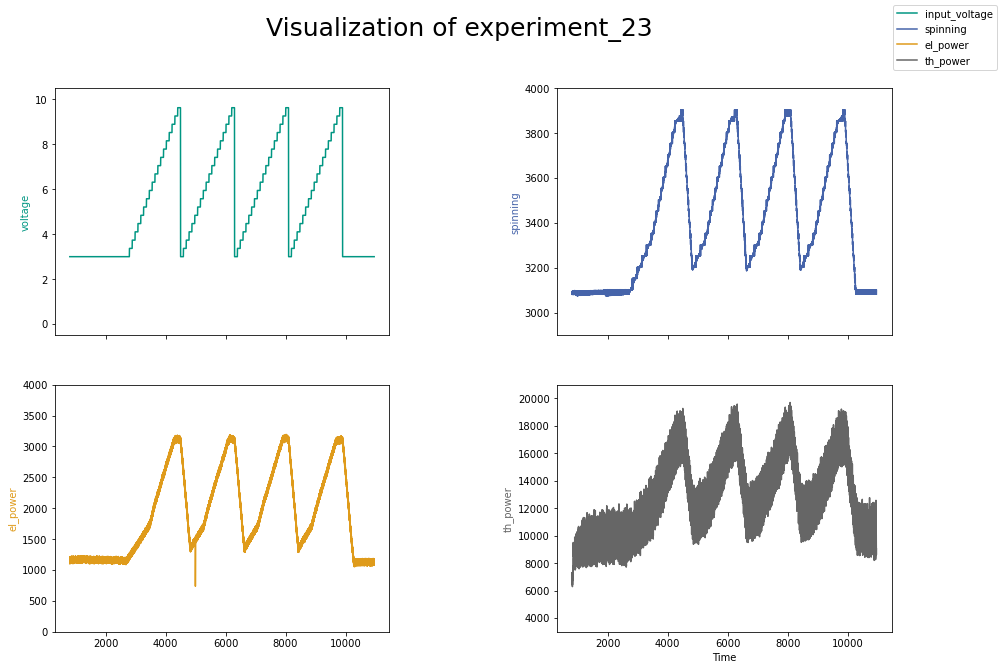

In [11]:
plot_experiment("experiment_23")

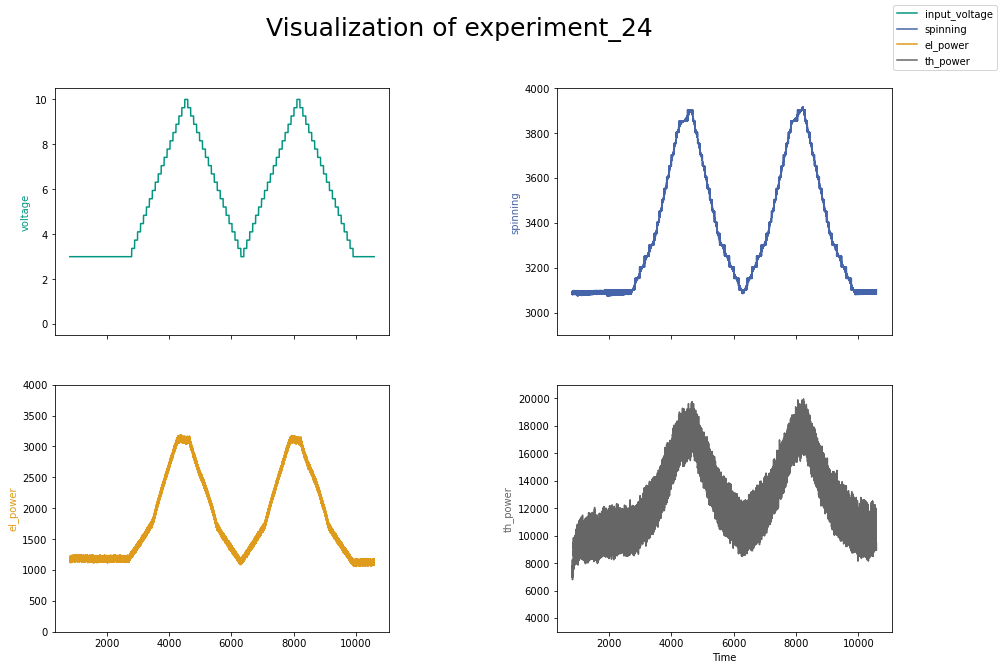

In [12]:
plot_experiment("experiment_24")